# Exemplo - Dados do site Alerta RIO

In [4]:
#Dados do ALERTA RIO, estação Jardim Botânico
#http://alertario.rio.rj.gov.br/
import numpy as np
import itertools
#local dos dados
dir_local = "/home/asevedo/temp/dados_meteoro_rio/"
file_name = dir_local+"jardim_botanico_201902_Met.txt"
file_name

'/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201902_Met.txt'

In [5]:
#Vamos examinar o conteudo dos dados
#%more /home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201903_Met.txt
#%pycat /home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201901_Met.txt

In [6]:
l1  = ('16/02/2019  HBV 23:00:00          0.0        ND        ND         25.2       ND       ND').split()
print(l1)
if 'HBV' in l1: l1.remove('HBV')
print(l1)

['16/02/2019', 'HBV', '23:00:00', '0.0', 'ND', 'ND', '25.2', 'ND', 'ND']
['16/02/2019', '23:00:00', '0.0', 'ND', 'ND', '25.2', 'ND', 'ND']


In [7]:
#Lendo um unico arquivo
f_data = open(file_name)
n_data = 0
chuva_soma = 0
temperatura = 0
for line in itertools.islice(f_data, 6, None): #(aquivo,inicio,final)
#for line in f_data:
    lista_dados = line.split()   #separa o string e guarda em lista 
    if 'HBV' in lista_dados: lista_dados.remove('HBV')
    try:
        chuva_soma += float(lista_dados[2])   #chuva_soma = chuva_soma + ...
        temperatura += float(lista_dados[5])
    except ValueError:
        continue
    n_data += 1
f_data.close()    
print('Precipitação Acumulada: {:.1f} mm'.format(chuva_soma))
print('Temperatura média: {:9.1f} C'.format(temperatura/n_data))
print('N linhas:',n_data)

Precipitação Acumulada: 362.0 mm
Temperatura média:      27.1 C
N linhas: 2632


In [8]:
#Lendo varios arquivos (doze no total)
dir_local = "/home/asevedo/temp/dados_meteoro_rio/"
chuva_data = []
temp_data = []
for i in range(1,13):
    if i < 10: file_name = dir_local+"jardim_botanico_20190"+str(i)+"_Met.txt"
    else: file_name = dir_local+"jardim_botanico_2019"+str(i)+"_Met.txt"
    f_data = open(file_name)
    n_data = 0
    chuva_soma = 0
    temperatura = 0
    for line in itertools.islice(f_data, 6, None): #(aquivo,inicio,final)
        #print(n_data)
        lista_dados = line.split()
        if 'HBV' in lista_dados: lista_dados.remove('HBV')
        try:
            chuva_soma += float(lista_dados[2])
            temperatura += float(lista_dados[5])
        except ValueError:
            continue
        n_data += 1
    chuva_data.append(chuva_soma)
    temp_data.append(temperatura/n_data)
f_data.close()    
chuva_array = np.array(chuva_data)
temp_array = np.array(temp_data)
print(chuva_array)
print('--'*40)
print(temp_array)
temp_array.size

[ 51.  362.  351.4 377.6 131.   63.  103.4 206.4 173.8  90.2 181.4  87.6]
--------------------------------------------------------------------------------
[28.85609244 27.09836626 26.57427707 26.08940236 24.3115074  23.16631468
 21.35496575 20.98256048 22.35114583 24.42345222 23.73704861 25.53971774]


12

In [9]:
print('Maior precipitação:',int(chuva_array.max()))
print('Menor precipitação:',int(chuva_array.min()))

Maior precipitação: 377
Menor precipitação: 51


In [10]:
#Uma forma mais eficiente fazer loops sobre arquivos 
import os
dir_local = "/home/asevedo/temp/dados_meteoro_rio/"
for file in os.listdir(dir_local):
    if file.endswith(".txt"):
        file_name = os.path.join(dir_local, file)   #file_name = dir_local+file
        print(file_name)
print('done!')

/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201905_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201902_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201907_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201912_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201906_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201910_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201901_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201908_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201903_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201904_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201911_Met.txt
/home/asevedo/temp/dados_meteoro_rio/jardim_botanico_201909_Met.txt
done!


In [11]:
import matplotlib.pyplot as plt

In [12]:
mes = ['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ']

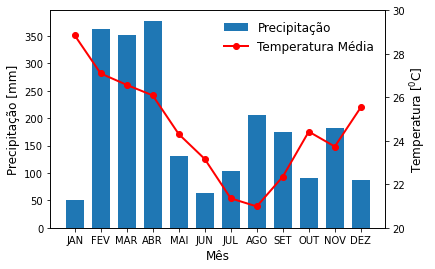

In [13]:
plot1 = plt.bar(mes,chuva_array,width=0.7)
plt.ylabel('Precipitação [mm]',fontsize=12)
plt.xlabel('Mês',fontsize=12)
plt.twinx()
plt.ylim(20,30)
plt.ylabel('Temperatura '+r'[$^{0}$C]',fontsize=12)
plot2 = plt.plot(mes,temp_array,'r-o',lw=2)
plots = [plot1] + plot2
legs = ['Precipitação','Temperatura Média']
plt.legend(plots,legs,frameon=False,fontsize=12)
plt.savefig('plot_chuva_Rio19.pdf')